In [8]:
!pip install pandas numpy matplotlib seaborn datetime

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar

In [15]:
data = pd.read_csv('uber.csv')

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
#Check for Missing Values
#If a data is not available, Python uses NaN to represent it
#Let's check below if there is any data points missing

In [24]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [26]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [27]:
###For this analysis, we are droping all the NaN values in the dataset

In [28]:
data=data.dropna()

In [30]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [36]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [32]:
##Here dates are recognized as object so we have to convert them to date format

In [41]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')

In [42]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [47]:
##Extracting the time, day and month information and creating a separate column for them

hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR']=hour
data['DAY']=day
data['DAY OF WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday
    
    

In [48]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [50]:
##Categories We have

In [51]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

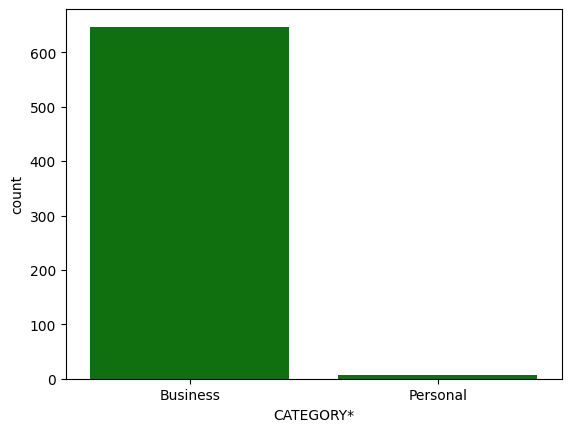

In [53]:
sns.countplot(x='CATEGORY*',data=data, color='green')

In [59]:
##How Long do people travel with Uber??

<Axes: ylabel='Frequency'>

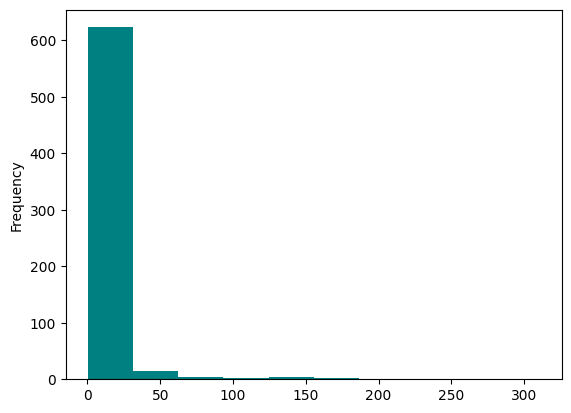

In [58]:
data['MILES*'].plot.hist(color='teal')

In [60]:
### What Hour Do Most People Take Uber to Their Destination??

Text(0.5, 1.0, 'Number of trips vs Hours')

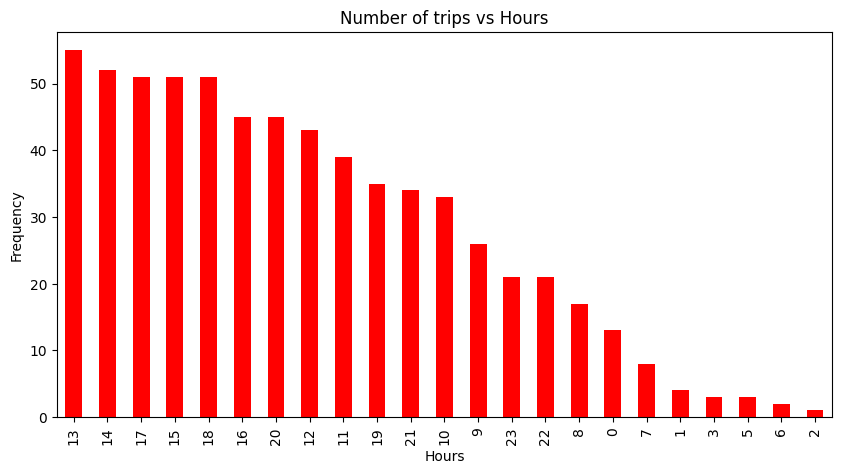

In [65]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs Hours')

In [66]:
####Check the Purpose of Trips

<Axes: xlabel='PURPOSE*'>

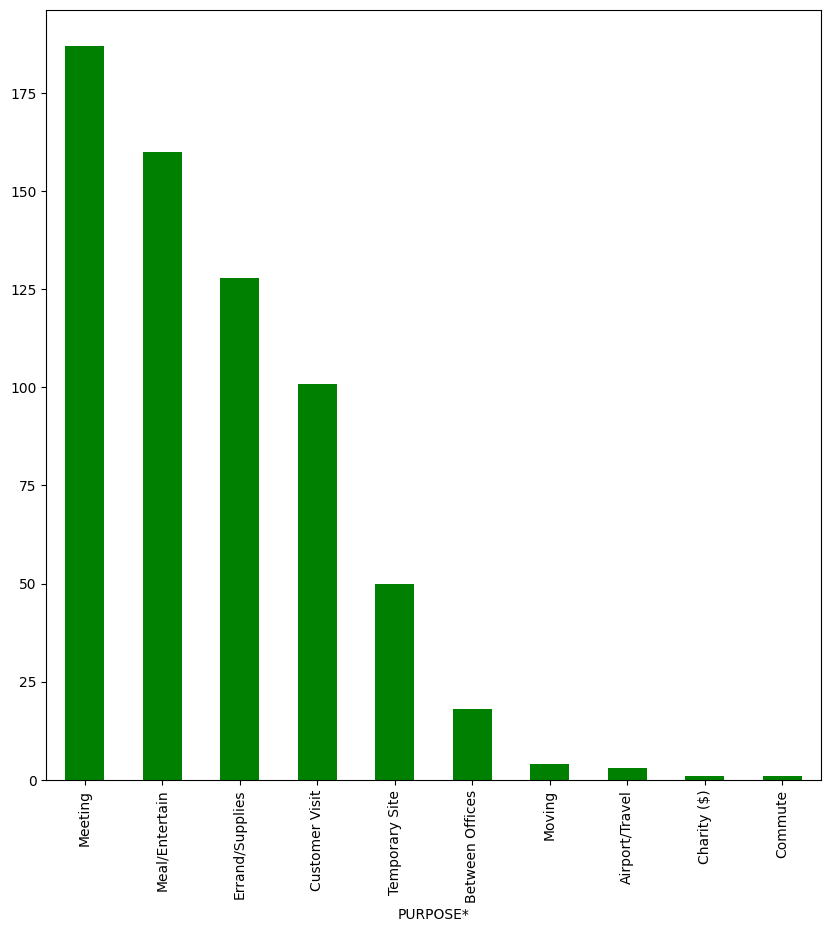

In [68]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,10),color='green')

In [69]:
##Which day has the highest number of trips??

<Axes: xlabel='WEEKDAY'>

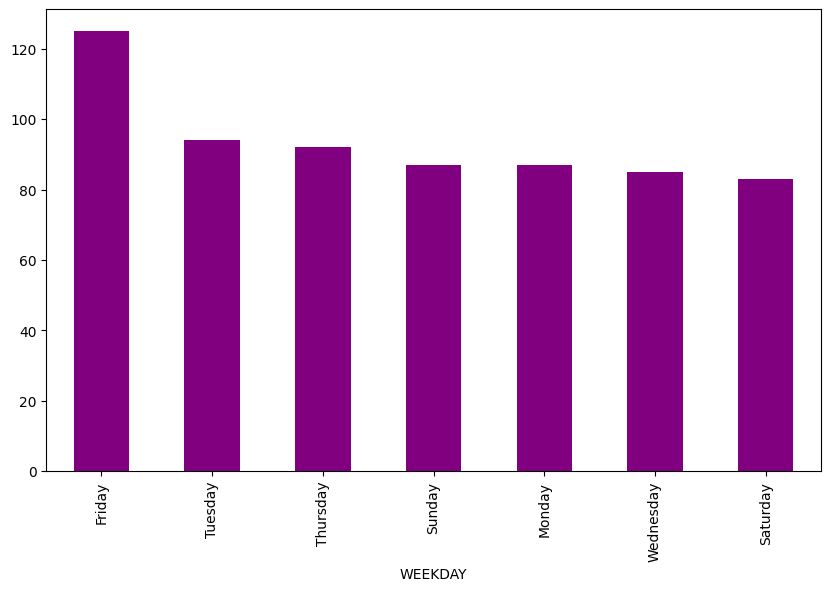

In [77]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,6),color='purple')

In [78]:
###What are the number of trips per each day??


<Axes: xlabel='DAY'>

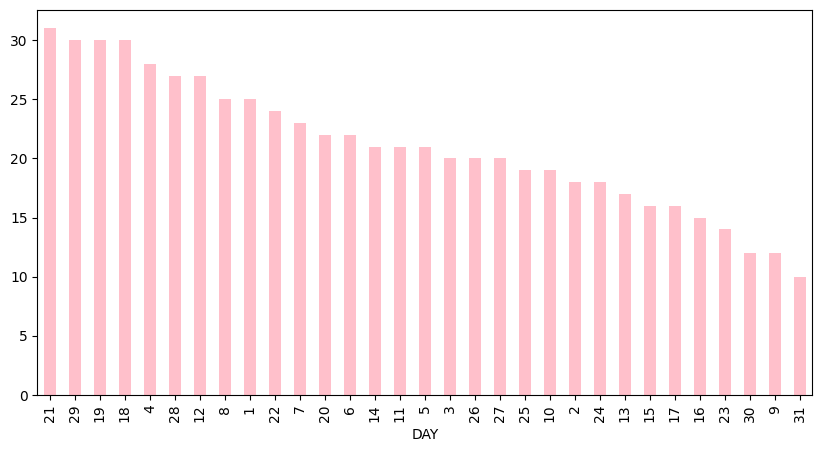

In [79]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='pink')

In [80]:
###What are the trips in a month?

<Axes: xlabel='MONTH'>

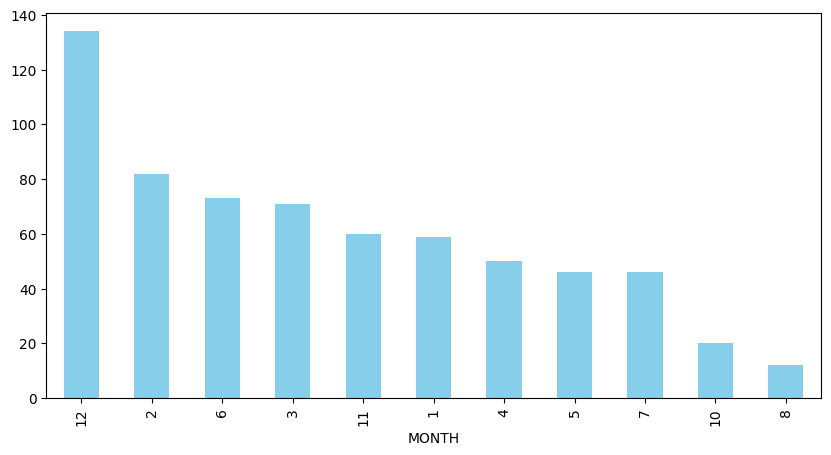

In [81]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='skyblue')